In [254]:
import numpy as np
import pandas as pd
import seaborn as sns
from math import sqrt
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression,Ridge,Lasso
plt.rc('figure',figsize=(15,7))


In [78]:
df=pd.read_csv("/Users/akhilmaddu/desktop/bike_share/train.csv")

In [79]:
df.shape

(10886, 12)

In [80]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [81]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
season,10886.0,2.506614,1.116174,1.00,2.0000,3.000,4.0000,4.0000
holiday,10886.0,0.028569,0.166599,0.00,0.0000,0.000,0.0000,1.0000
workingday,10886.0,0.680875,0.466159,0.00,0.0000,1.000,1.0000,1.0000
weather,10886.0,1.418427,0.633839,1.00,1.0000,1.000,2.0000,4.0000
temp,10886.0,20.230860,7.791590,0.82,13.9400,20.500,26.2400,41.0000
atemp,10886.0,23.655084,8.474601,0.76,16.6650,24.240,31.0600,45.4550
humidity,10886.0,61.886460,19.245033,0.00,47.0000,62.000,77.0000,100.0000
windspeed,10886.0,12.799395,8.164537,0.00,7.0015,12.998,16.9979,56.9969
casual,10886.0,36.021955,49.960477,0.00,4.0000,17.000,49.0000,367.0000
registered,10886.0,155.552177,151.039033,0.00,36.0000,118.000,222.0000,886.0000


In [82]:
df.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [83]:
feature_columns=df.columns.tolist()
int_features=[]
float_features=[]
for i in feature_columns:
    if df[i].dtypes=="int64":
        int_features.append(i)
    if df[i].dtypes=="float64":
        float_features.append(i)
        
     

#  Feature Engineering

In [84]:
df['datetime'] = pd.to_datetime(df['datetime'], errors='coerce')

In [85]:
df['date']=df['datetime'].dt.date
df['hour']=df['datetime'].dt.hour
df['weekday']=df['datetime'].dt.weekday
df['month']=df['datetime'].dt.month
df['week']=df['datetime'].dt.week

In [86]:
df.shape

(10886, 17)

In [87]:
df  = df.drop(["datetime"],axis=1)

In [91]:
df.shape

(10886, 16)

In [98]:
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,hour,weekday,month,week
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01,0,5,1,52
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01,1,5,1,52
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011-01-01,2,5,1,52
3,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011-01-01,3,5,1,52
4,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011-01-01,4,5,1,52


# Outlier Analysis

In [96]:
df_WithoutOutliers = df[np.abs(df["count"]-df["count"].mean())<=(3*df["count"].std())]

In [97]:
print("Before outer analysis:{}".format(df.shape))
print("After  outer analysis:{}".format(df_WithoutOutliers.shape))

Before outer analysis:(10886, 16)
After  outer analysis:(10739, 16)


# Correlation Analysis

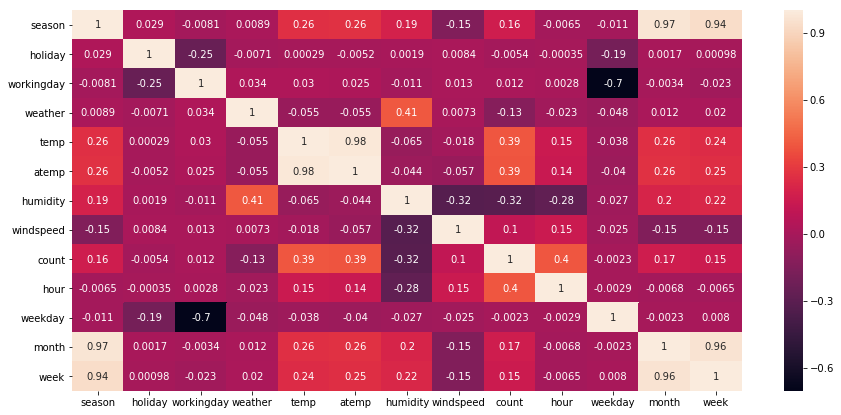

In [103]:
corr = df.drop(['casual','registered'],axis=1).corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,annot=True)
plt.show()

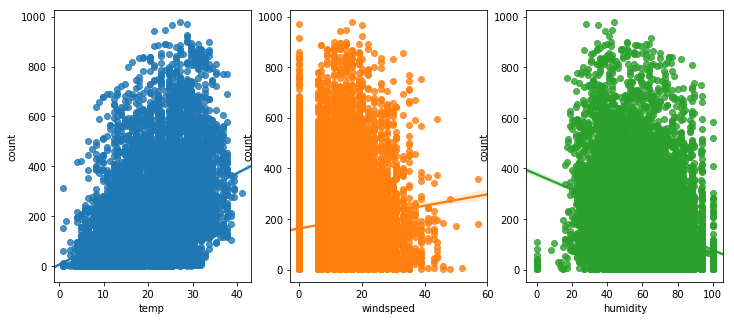

In [107]:
fig,(ax1,ax2,ax3) = plt.subplots(ncols=3)
fig.set_size_inches(12, 5)
sns.regplot(x="temp", y="count", data=df,ax=ax1)
sns.regplot(x="windspeed", y="count", data=df,ax=ax2)
sns.regplot(x="humidity", y="count", data=df,ax=ax3)
plt.show()

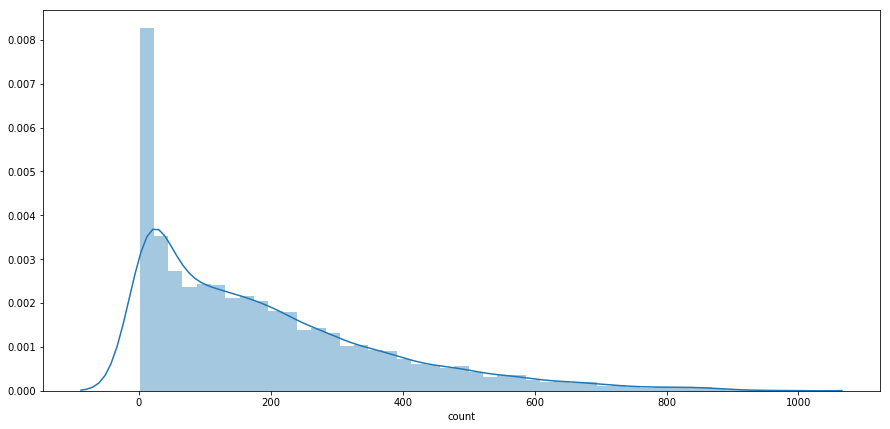

In [117]:
# This is not normally distributed
sns.distplot(df['count'])
plt.title("before applying log")
plt.xlabel("count")
plt.show()

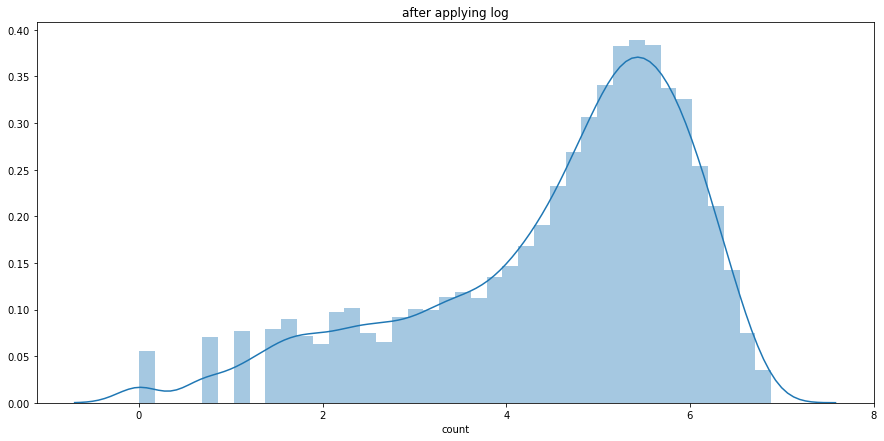

In [118]:
# This is not normally distributed
sns.distplot(np.log(df['count']))
plt.title("after applying log")
plt.xlabel("count")
plt.show()

In [120]:
df['month'].value_counts()

7     912
6     912
5     912
12    912
8     912
11    911
10    911
4     909
9     909
3     901
2     901
1     884
Name: month, dtype: int64

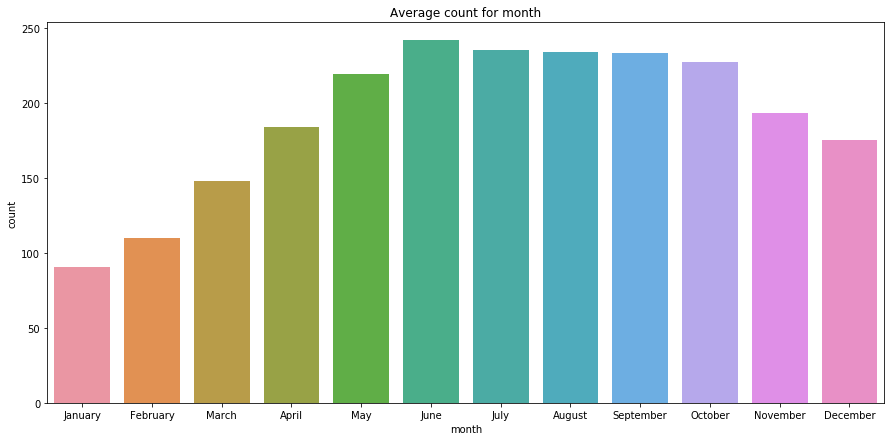

In [135]:
months = ["January","February","March","April","May","June","July","August","September","October","November","December"]
month_count=pd.DataFrame(df.groupby("month")["count"].mean()).reset_index()
sns.barplot(data=month_count,x="month",y="count",label=months)
plt.xticks(np.arange(0,12),months)
plt.title("Average count for month")
plt.show()

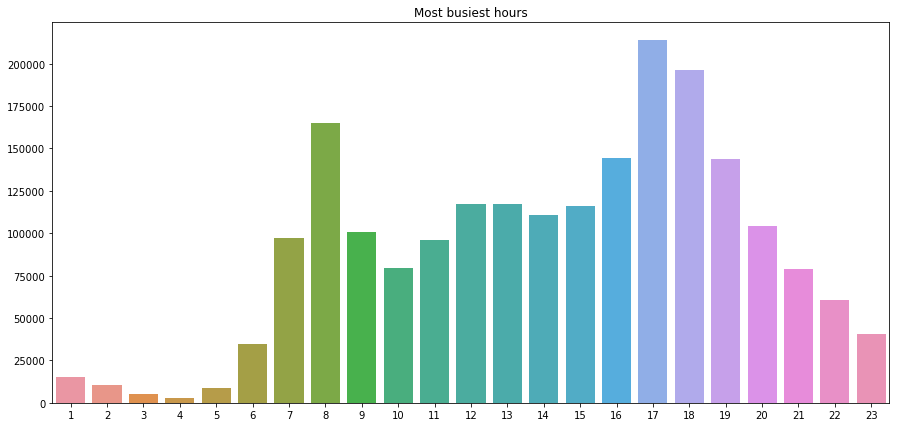

In [142]:
hours=[]
for i in range(1,24):
    d=np.sum(df[df['hour']==i]['count'].values.tolist())
    hours.append(d)
sns.barplot(np.arange(1,24),hours)
plt.title("Most busiest hours")
plt.show()

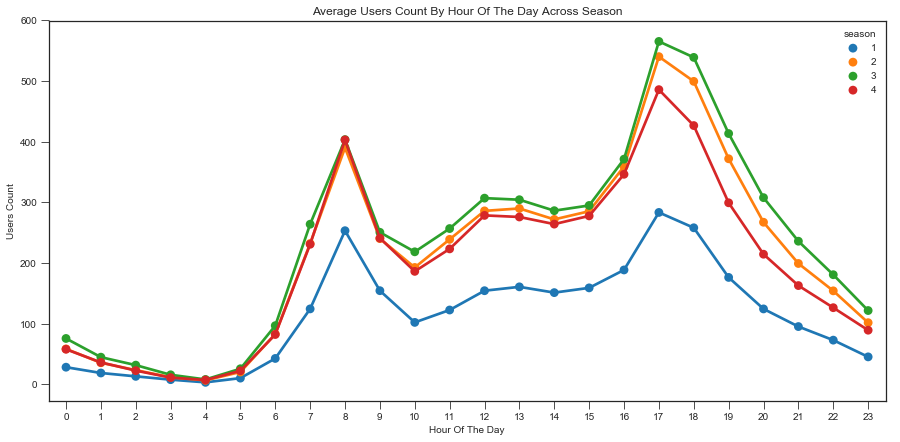

In [159]:
#sns.set_style("whitegrid")

hourAggregated = pd.DataFrame(df.groupby(["hour","season"],sort=True)["count"].mean()).reset_index()
sns.pointplot(x=hourAggregated["hour"], y=hourAggregated["count"],hue=hourAggregated["season"], data=hourAggregated, join=True)
plt.xlabel('Hour Of The Day')
plt.ylabel('Users Count')
plt.title("Average Users Count By Hour Of The Day Across Season")
plt.show()


# Finding 0's with random forest in windspeed

In [174]:
df_WithoutOutliers['windspeed'].value_counts()

0.0000     1297
8.9981     1109
11.0014    1037
7.0015     1027
12.9980    1027
15.0013     942
6.0032      866
16.9979     807
19.0012     664
19.9995     486
22.0028     366
23.9994     272
26.0027     231
27.9993     187
30.0026     109
31.0009      89
32.9975      79
35.0008      56
39.0007      26
36.9974      22
43.0006      12
40.9973      11
43.9989       8
46.0022       3
56.9969       2
47.9988       2
50.0021       1
51.9987       1
Name: windspeed, dtype: int64

In [175]:
df1=df_WithoutOutliers

In [190]:
ukrain=df_WithoutOutliers[df_WithoutOutliers['windspeed']==0]

In [180]:
russia=df_WithoutOutliers[df_WithoutOutliers['windspeed']!=0]

In [181]:
russia.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,hour,weekday,month,week
5,1,0,0,2,9.84,12.880,75,6.0032,0,1,1,2011-01-01,5,5,1,52
10,1,0,0,1,15.58,19.695,76,16.9979,12,24,36,2011-01-01,10,5,1,52
11,1,0,0,1,14.76,16.665,81,19.0012,26,30,56,2011-01-01,11,5,1,52
12,1,0,0,1,17.22,21.210,77,19.0012,29,55,84,2011-01-01,12,5,1,52
13,1,0,0,2,18.86,22.725,72,19.9995,47,47,94,2011-01-01,13,5,1,52


In [192]:
x_train=russia.drop(['windspeed','date','atemp'],axis=1)
y_train=russia['windspeed']
x_test=ukrain.drop(['windspeed','date','atemp'],axis=1)

In [201]:
from sklearn.ensemble import RandomForestRegressor
RF=RandomForestRegressor()
RF.fit(x_train,y_train)
y_pred=RF.predict(x_test)

In [204]:
ukrain['windspeed']=y_pred

In [206]:
new_df=mig=russia.append(ukrain)
new_df.reset_index(inplace=True)

# Trying with Random forest

In [237]:
x=new_df.drop(['atemp','casual','registered','date','count'],axis=1)
y=np.log(new_df['count'])

In [247]:
# RMSLE function
def rmsle(y, y_,convertExp=True):
    if convertExp:
        y = np.exp(y),
        y_ = np.exp(y_)
    log1 = np.nan_to_num(np.array([np.log(v + 1) for v in y]))
    log2 = np.nan_to_num(np.array([np.log(v + 1) for v in y_]))
    calc = (log1 - log2) ** 2
    return np.sqrt(np.mean(calc))

# Random Forest

In [258]:
from sklearn.model_selection import train_test_split
RF9=RandomForestRegressor()
X_train2, X_test2, y_train2, y_test2 = train_test_split(x,y , test_size=0.33)
RF9.fit(X_train2,y_train2)
RF_pred=RF9.predict(X_test2)
print ("RMSLE Value For Random Forest: ",rmsle(np.exp(y_test2),np.exp(RF_pred),False))

RMSLE Value For Random Forest:  0.400722560789


 # with Gradient Boosting

In [259]:
from sklearn.ensemble import GradientBoostingRegressor
gbm = GradientBoostingRegressor(n_estimators=4000,alpha=0.01); ### Test 0.41
gbm.fit(X_train2,y_train2)
preds = gbm.predict(X_test2)
print ("RMSLE Value For Gradient Boost: ",rmsle(np.exp(y_test2),np.exp(preds),False))

RMSLE Value For Gradient Boost:  0.334632844578


#   Linear Regression

In [252]:
model = LinearRegression()
model.fit(X_train2,y_train2)
preds = model.predict(X_test2)
print ("RMSLE Value For Linear Regression: ",rmsle(np.exp(y_test2),np.exp(preds),False))

RMSLE Value For Linear Regression:  1.02820311842


# Ridge Regression

In [265]:
RR=Ridge()
RR.fit(X_train2,y_train2 )
preds = RR.predict(X_test2)
print ("RMSLE Value For Ridge Regression: ",rmsle(np.exp(y_test2),np.exp(preds),False))

RMSLE Value For Ridge Regression:  1.02893264205


# Lasso Regression

In [267]:
LR=Lasso()
LR.fit(X_train2,y_train2 )
LR_pred = LR.predict(X_test2)
print ("RMSLE Value For Ridge Regression: ",rmsle(np.exp(y_test2),np.exp(LR_pred),False))

RMSLE Value For Ridge Regression:  1.04178358702
